# 추천시스템 기초 실습

## 0. 데이터 불러오기 및 탐색

데이터는 movielens에서 제공하는 데이터 중 하나로, 가장 크기가 작은 버전으로 가져왔습니다.
- movies.csv: 영화 제목과 영화 장르에 대한 데이터
- ratings.csv: user(사용자)-movie(아이템) 선호도 데이터
- tags.csv: user가 해당 movie에 부여한 tag 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## 1. Content-based Filtering 실습

content-based filtering은 movie(아이템) 간의 유사도를 계산하여 해당 movie와 유사한 movie를 추천해주는 간단한 추천 알고리즘

제공된 데이터에서 movie의 콘텐츠를 확인할 수 있는 데이터는 movies.csv의 장르와 tags.csv의 태그 정보가 있음

In [149]:
# 아이템 간 유사도 계산을 위한 데이터프레임 만들기
# 열은 영화 장르가 될 수도 있고, 영화 태그가 될 수도 있음 (영화 태그의 경우 모든 영화에 대한 태그는 없음)

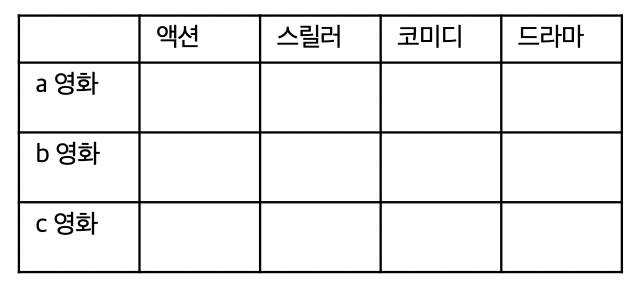

In [450]:
# 해당 데이터프레임은 사용자-영화 선호도 행렬입니당
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.index = movies['movieId']
genres = movies['genres'].str.split('|')
genre_col = list(set([j for i in genres.tolist() for j in i])) # 전체 장르 종류

piv1 = pd.DataFrame(columns=genre_col, index=movies.index)
for i in piv1.index:
    for j in genre_col:
        if(j in movies.loc[i,'genres']):
            piv1.loc[i,j] = 1
piv1

,Drama,War,Fantasy,Thriller,Adventure,Film-Noir,Horror,(no genres listed),Western,Comedy,Mystery,Romance,Musical,IMAX,Crime,Action,Sci-Fi,Documentary,Children,Animation
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1
193583,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
193585,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# TF-IDF를 적용할 수 있지만 여기서는 skip
# TF-IDF를 적용하게 되면 다음과 같이 나오긴 합니당

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [451]:
movies['corpus'] = movies['genres'].apply(lambda x : ' '.join(x.split('|')))

In [104]:
tfidv = TfidfVectorizer().fit(movies['corpus'])

In [105]:
temp = pd.DataFrame(tfidv.transform(movies['corpus']).toarray())

In [106]:
temp

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9738,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9740,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [107]:
# 아이템 간 유사도 구하기
from sklearn.metrics.pairwise import cosine_similarity

In [452]:
# 영화-영화의 유사도를 코사인 유사도를 사용해서 구해줍니당
piv1.fillna(0,inplace=True)
CBF = pd.DataFrame(cosine_similarity(piv1))

In [453]:
# movie - moive 아이템 간 유사도 데이터프레임
CBF.index = piv1.index
CBF.columns = piv1.index
CBF

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.670820,0.288675,0.353553,0.288675,0.500000,0.288675,0.353553,0.000000,0.500000,0.288675,...,0.750000,0.353553,0.353553,0.500000,0.0,1.000000,0.866025,0.00000,0.707107,0.500000
193583,0.774597,0.333333,0.408248,0.333333,0.577350,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.577350,0.408248,0.408248,0.577350,0.0,0.866025,1.000000,0.00000,0.408248,0.577350
193585,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.707107,0.707107,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000


In [454]:
# 각 영화와 다른 영화와의 유사도가 모두 계산되어 있고, 유사도가 높은 영화가 가장 비슷한 영화라고 할 수 있습니당
# 입력 아이템과 가장 유사한 아이템 TOP10개를 뽑아봅시당
def getCBF(movieId):
    print('입력 영화: ', movies.loc[movieId,'title'], '\n입력 영화 장르: ', movies.loc[movieId,'genres'], '\n\n====Most similar List====')
    
    index = CBF[movieId].sort_values(ascending=False)[0:10].index.values # 해당 영화와의 유사도 상위 10개 index
    
    return movies.loc[index,['movieId','title','genres','corpus']]

In [455]:
getCBF(193583)

입력 영화:  No Game No Life: Zero (2017) 
입력 영화 장르:  Animation|Comedy|Fantasy 

====Most similar List====


,movieId,title,genres,corpus
movieId,,,,
79008,79008,South Park: Imaginationland (2008),Animation|Comedy|Fantasy,Animation Comedy Fantasy
126577,126577,"Daddy, I'm A Zombie (2012)",Animation|Comedy|Fantasy,Animation Comedy Fantasy
193583,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,Animation Comedy Fantasy
72692,72692,Mickey's Once Upon a Christmas (1999),Animation|Comedy|Fantasy,Animation Comedy Fantasy
4158,4158,Monkeybone (2001),Animation|Comedy|Fantasy,Animation Comedy Fantasy
182297,182297,Porky in Wackyland (1938),Animation|Comedy|Fantasy,Animation Comedy Fantasy
6773,6773,"Triplets of Belleville, The (Les triplettes de...",Animation|Comedy|Fantasy,Animation Comedy Fantasy
7228,7228,Cool World (1992),Animation|Comedy|Fantasy,Animation Comedy Fantasy
139855,139855,Anomalisa (2015),Animation|Comedy|Fantasy,Animation Comedy Fantasy


## 2. Collaborative Filtering 실습

User-based CF를 실습해 봅시당

In [296]:
# User-Item 간 선호도 데이터프레임 만들기

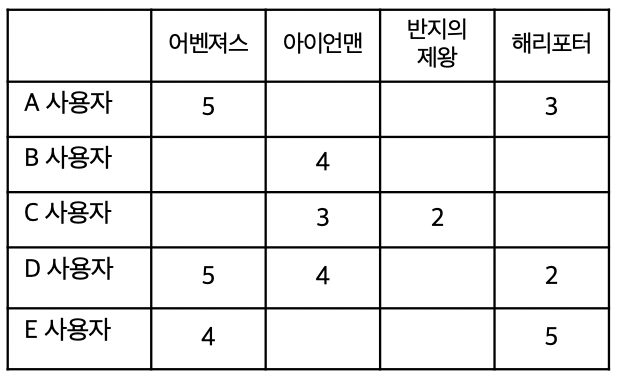

In [402]:
# 해당 데이터프레임은 사용자-영화 선호도 데이터프레임입니당
ratings = pd.read_csv('ml-latest-small/ratings.csv')
piv2 = ratings.pivot(index='userId', columns='movieId', values='rating')
piv2

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [403]:
# 사용자 간 유사도 구하기
piv2.fillna(0,inplace=True)
CF = pd.DataFrame(np.corrcoef(piv2))

In [404]:
# 사용자와 사용자의 유사도를 구할 때 꼭 코사인 유사도를 사용하지 않아도 됩니당
# 보완 코사인 유사도 혹은 피어슨 상관계수를 적용해보아유
CF.index = piv2.index
CF.columns = piv2.index
CF

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.019400,0.053056,0.176920,0.120866,0.104418,0.143793,0.128547,0.055268,-0.000298,...,0.066256,0.149942,0.186978,0.056530,0.134412,0.121981,0.254200,0.262241,0.085434,0.098719
2,0.019400,1.000000,-0.002594,-0.003804,0.013183,0.016257,0.021567,0.023750,-0.003448,0.061880,...,0.198549,0.010888,-0.004030,-0.005345,-0.007919,0.011299,0.005813,0.032730,0.024373,0.089329
3,0.053056,-0.002594,1.000000,-0.004556,0.001887,-0.004577,-0.005634,0.001703,-0.003111,-0.005501,...,0.000150,-0.000585,0.011211,-0.004822,0.003678,-0.003246,0.012885,0.008096,-0.002963,0.015962
4,0.176920,-0.003804,-0.004556,1.000000,0.121018,0.065719,0.100602,0.054235,0.002417,0.015615,...,0.072848,0.114287,0.281866,0.039699,0.065493,0.164831,0.115118,0.116861,0.023930,0.062523
5,0.120866,0.013183,0.001887,0.121018,1.000000,0.294138,0.101725,0.426576,-0.004185,0.023471,...,0.061912,0.414931,0.095394,0.254117,0.141077,0.090158,0.145764,0.122607,0.258289,0.040372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.121981,0.011299,-0.003246,0.164831,0.090158,0.047506,0.172499,0.081913,0.057989,0.054877,...,0.153892,0.084208,0.224637,0.035251,0.106752,1.000000,0.115999,0.188354,0.052385,0.093851
607,0.254200,0.005813,0.012885,0.115118,0.145764,0.142169,0.173293,0.178133,0.003257,-0.004809,...,0.080034,0.187588,0.173025,0.126267,0.101138,0.115999,1.000000,0.258245,0.142533,0.098518
608,0.262241,0.032730,0.008096,0.116861,0.122607,0.137954,0.305439,0.175912,0.086229,0.048373,...,0.136316,0.174069,0.164479,0.133734,0.144896,0.188354,0.258245,1.000000,0.109563,0.248944


In [456]:
# 입력 사용자와 가장 가까운 유저에서 선호도가 가장 높은 아이템 TOP5를 추천해봅시당!
# 이 때, 입력 사용자가 이미 시청한/평가한 영화는 제외해야하도록 추천 리스트를 만들어봅시당
def getCF(userId):
    movieId = ratings.loc[ratings['userId']==userId,'movieId']
    genre_sum = piv1.loc[piv1.index.isin(movieId)].sum(axis=0).sort_values(ascending=False)
    
    plt.bar(genre_sum.index, genre_sum)
    plt.title(str(userId)+'\'s favorite genres')
    plt.xticks(fontsize=10, rotation=90)
    plt.show()
    
    print('=====Recommendation List=====')
    
    similar_index = CF[userId].sort_values(ascending=False).index[1]  # 입력 사용자와 가장 유사한 유저 index
    similar_movie = piv2.loc[similar_index].sort_values(ascending=False)
    similar_movie = similar_movie.loc[similar_movie.index.isin(movieId)==False] # 유사한 유저가 시청한 영화 중 입력 사용자가 본 영화는 제외
    index = similar_movie.head(5).index.values

    return movies.loc[index,['movieId','title','genres','corpus']]

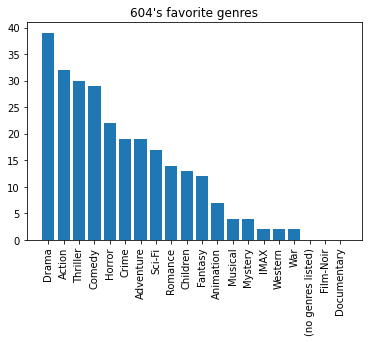

=====Recommendation List=====


,movieId,title,genres,corpus
movieId,,,,
280,280,Murder in the First (1995),Drama|Thriller,Drama Thriller
318,318,"Shawshank Redemption, The (1994)",Crime|Drama,Crime Drama
333,333,Tommy Boy (1995),Comedy,Comedy
47,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,Mystery Thriller
246,246,Hoop Dreams (1994),Documentary,Documentary


In [457]:
getCF(604)

## 3. Matrix Factorization 실습

같은 폴더에 있는 MF.py의 MatrixFactorization()을 적용해 봅시당

In [384]:
import MF

In [429]:
# 사용자-영화 선호도 데이터프레임입니당
piv2.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [436]:
# MF.py를 참고하여 인자를 입력해 보아유
factorizer = MF.MatrixFactorization(np.array(piv2), k=3, learning_rate=0.05, reg_param=0.01, epochs=20, verbose=True)
factorizer.fit()
R_reduced = factorizer.print_results()

Iteration: 10 ; cost = 0.0026
Iteration: 20 ; cost = 0.0025
User Latent P:
[[ 0.09264606  0.17257454  0.06759952]
 [-0.53380247  0.07585723  0.51993076]
 [-1.19781296 -2.60277805 -0.43124132]
 ...
 [-0.24266415  0.02239284  0.43145834]
 [-0.0153244   0.13115638 -0.03718187]
 [ 0.12136032  0.19759778 -0.15753766]]
Item Latent Q:
[[-0.18654746 -0.22804512 -0.37041241 ...  0.89979237 -0.07833585
  -0.752201  ]
 [-0.28300522 -0.0629981  -0.20389853 ...  0.64996784 -0.52865099
   0.93452392]
 [-0.40627057 -0.52393036 -0.0395337  ... -0.8727679   0.8227873
   1.55511804]]
P x Q:
[[-0.09358608 -0.06741679 -0.07217741 ...  0.13653143 -0.04286918
   0.19671181]
 [-0.13312106 -0.15545533  0.16170509 ... -0.88478551  0.4295063
   1.28097086]
 [ 1.1352494   0.66306588  0.99143597 ... -2.39313143  1.11497302
  -2.20199338]
 ...
 [-0.13635773 -0.17212645  0.0682628  ... -0.58035571  0.36216974
   0.87442751]
 [-0.01915331  0.01471276 -0.01959631 ...  0.1039098  -0.09872827
   0.0762736 ]
 [-0.014557

[[ 4.59318847  4.36737988  3.92878541 ...  4.64659731  4.32238142
   5.22140409]
 [ 3.52623572  3.25192359  3.13525015 ...  2.59786261  3.76733914
   5.27824537]
 [ 3.16199534  2.43783396  2.33237019 ... -0.54309415  2.82019502
   0.1626703 ]
 ...
 [ 4.16603259  3.878286    3.6848414  ...  3.54532595  4.34303612
   5.51473556]
 [ 3.55986574  3.34175394  2.87361101 ...  3.50622018  3.15876683
   3.99321038]
 [ 3.96624531  3.77124003  3.2159761  ...  4.17921949  3.41569199
   4.16710362]]
Final RMSE:
0.002507429830409449


In [437]:
# Matrix Factorizaion으로 찾아낸 잠재요인을 기반으로 재생산한 행렬이네유
pd.DataFrame(R_reduced)

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.593188,4.367380,3.928785,3.047336,3.485625,4.809788,3.857554,3.472847,3.762925,4.228868,...,4.479129,4.001395,4.682200,4.428631,4.657933,4.380485,4.665759,4.646597,4.322381,5.221404
1,3.526236,3.251924,3.135250,1.979461,2.516239,3.909370,2.645077,3.029654,3.306485,3.513168,...,3.414971,2.609579,2.698507,3.444506,3.476179,3.338761,4.360980,2.597863,3.767339,5.278245
2,3.161995,2.437834,2.332370,2.936589,2.422104,2.900192,2.683123,1.081555,1.872718,3.147747,...,1.179863,2.211108,2.809450,2.382660,2.929996,6.218029,-2.140371,-0.543094,2.820195,0.162670
3,3.436626,3.187594,2.558850,2.053803,2.302921,3.466779,2.839697,1.761497,2.123495,2.868097,...,3.089367,3.023757,4.113382,3.151106,3.513618,3.579931,2.334601,3.726289,2.783327,2.831303
4,4.088510,3.783926,3.075766,2.987413,2.976262,3.869301,3.637232,2.013194,2.494994,3.472934,...,3.329157,3.663243,4.960318,3.755140,3.864910,4.676018,1.774956,3.980660,3.126928,2.352299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3.581766,3.305262,2.920093,2.097606,2.511630,3.849541,2.823239,2.415585,2.722235,3.242193,...,3.390550,3.002941,3.650230,3.303742,3.844722,3.711340,3.267889,3.386885,3.409678,4.042919
606,3.760379,3.570538,3.024626,2.323264,2.619325,3.727102,3.153174,2.494083,2.844718,3.363799,...,3.465892,3.097601,3.915036,3.757245,3.259854,3.318918,3.659066,3.803772,3.160289,3.958562
607,4.166033,3.878286,3.684841,2.610774,3.142303,4.583388,3.293925,3.435547,3.705279,4.026825,...,4.079256,3.414655,3.692715,3.947359,4.435523,4.191531,4.570078,3.545326,4.343036,5.514736
608,3.559866,3.341754,2.873611,2.083493,2.446537,3.660277,2.880989,2.389662,2.714569,3.203281,...,3.335000,2.912709,3.626363,3.467613,3.347013,3.284874,3.516172,3.506220,3.158767,3.993210


## 4. 본인만의 추천 리스트 만들어보기

배운 내용 혹은 알고 있는 추천 알고리즘을 사용해서 user의 다음 추천 아이템에 대한 TOP10 추천 리스트를 만들어 봅시당

코드를 이해할 수 있도록 주석을 꼼꼼하게 달아주시면 감사하겠습니다!

In [552]:
def myrecommendation(userId):  
    print('\n=====Recommendation List=====')
    
    similar_score = [] # 유사한 유저의 index와 similarity 저장할 리스트
    tmp = CF[userId].sort_values(ascending=False)
    for i in tmp.index:
        if i==userId:continue # 첫번째는 자기 자신이므로 pass
        similar_score.append([i, tmp[i]])
        if len(similar_score)==10:break # 유저 10명만 참고하도록 하자. 늘리면 더 성능이 좋아질 수 있다.
            
    score_dic = {} 
    sim_dic = {}
    result = []
    
    for index, sim in similar_score:
        if sim<0:continue
        for movie in piv2.loc[userId, piv2.loc[userId,:]==0].index: # 평가가 이루어지지 않아 rate가 0인 영화에 접근
            sim_sum = 0
            if piv2.loc[index, movie]>0: # 유사한 유저가 해당 영화를 평가했다면?
                sim_sum += sim*piv2.loc[index, movie] # 유사도와 해당 유저의 rate를 곱해서 더해준다. 즉 입력 사용자가 보지 않은 영화도 추천할 수 있게 된다.
                
                score_dic.setdefault(movie, 0) # 더해줘야 하니까 쓰레기값이 담기지 않도록 디폴트 설정
                score_dic[movie] += sim_sum # 유사도*rate를 더해준다.
                
                sim_dic.setdefault(movie, 0)
                sim_dic[movie] += sim # 그냥 유사도만 더해준다.
                
    for key in score_dic: # 입력 사용자가 보지 않았던 모든 영화에 대한 score를 돈다.
        result.append((score_dic[key] / sim_dic[key], key)) # score를 sim으로 나눠주어 가중평균이라 볼 수 있다.
    result.sort()
    result.reverse()
    
    mylist = []
    for rate, movie in result: 
        mylist.append((rate, movies.loc[movie, 'movieId'], movies.loc[movie, 'title'], movies.loc[movie, 'genres'], movies.loc[movie, 'corpus']))
        if len(mylist)==10:break #TOP10에서 break
    
    return pd.DataFrame(mylist, columns=['rate', 'movieId', 'title', 'genres', 'corpus'])

In [553]:
myrecommendation(1)


=====Recommendation List=====


,rate,movieId,title,genres,corpus
0,5.0,1997,"Exorcist, The (1973)",Horror|Mystery,Horror Mystery
1,5.0,1252,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller,Crime Film-Noir Mystery Thriller
2,5.0,1248,Touch of Evil (1958),Crime|Film-Noir|Thriller,Crime Film-Noir Thriller
3,5.0,1235,Harold and Maude (1971),Comedy|Drama|Romance,Comedy Drama Romance
4,5.0,54272,"Simpsons Movie, The (2007)",Animation|Comedy,Animation Comedy
5,5.0,53322,Ocean's Thirteen (2007),Crime|Thriller,Crime Thriller
6,5.0,50872,Ratatouille (2007),Animation|Children|Drama,Animation Children Drama
7,5.0,33679,Mr. & Mrs. Smith (2005),Action|Adventure|Comedy|Romance,Action Adventure Comedy Romance
8,5.0,33493,Star Wars: Episode III - Revenge of the Sith (...,Action|Adventure|Sci-Fi,Action Adventure Sci-Fi
9,5.0,8874,Shaun of the Dead (2004),Comedy|Horror,Comedy Horror
